In [10]:
!pip3 install qiskit
!pip3 install pylatexenc
!pip3 install matplotlib
!pip3 install RISE


You should consider upgrading via the 'C:\users\frede\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\users\frede\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\users\frede\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\users\frede\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\users\frede\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\users\frede\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\users\frede\anaconda3\python.exe -m pip install --upgrade pip' command.


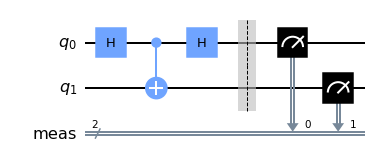

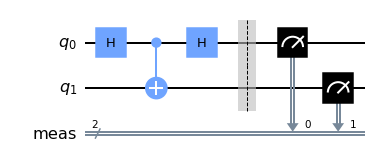

In [11]:
# Code for the basic bomb tester circuit

from qiskit import QuantumCircuit

bomb_tester = QuantumCircuit(2)
bomb_tester.h(0)
bomb_tester.cx(0, 1)
bomb_tester.h(0)
bomb_tester.measure_all()
bomb_tester.draw(output='mpl')

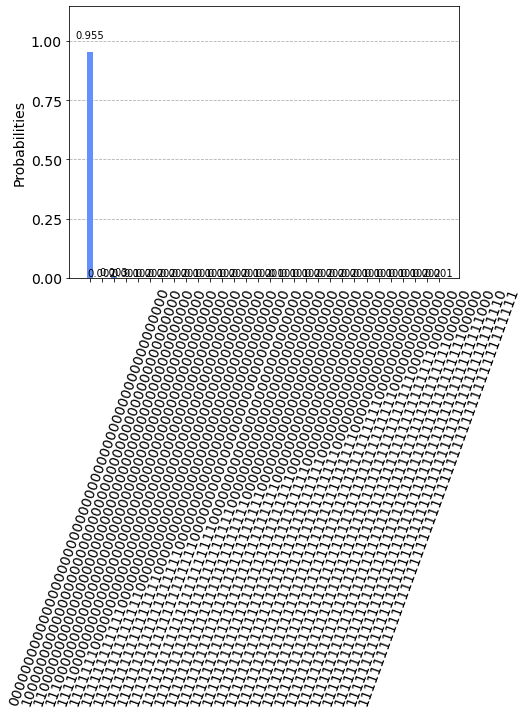

In [17]:
from qiskit.circuit import QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.circuit.library import RXGate

from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()



cycles = 50 # Choose the number of times we want to pass our photon through the mystery box. The more, the better.
theta = np.pi/cycles # The correct reflectivity of our beamsplitter is chosen for the quantum Zeno effect to work.

# Create our quantum circuit
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(cycles, 'c')
zeno_tester = QuantumCircuit(qr, cr)

# Create a chain of our variable beamsplitters and C-NOT bombs
for cycle in range(cycles-1):
    zeno_tester.append(RXGate(theta), [qr[0]])
    zeno_tester.cx(0, 1)
    zeno_tester.measure(qr[1],cr[cycle])
    zeno_tester.reset(qr[1])

# Add a final beamsplitter
zeno_tester.append(RXGate(theta), [qr[0]])

#Measure our photon to predict whether there is a bomb, and measure our bomb qubit to see if it exploded.
zeno_tester.measure(qr[0],cr[cycles-1])
zeno_tester.draw(output='mpl')

# Running the Zeno bomb tester

zeno_job = simulator.run(zeno_tester, shots=1000)
zeno_result = zeno_job.result()
zeno_counts = zeno_result.get_counts(zeno_tester)

plot_histogram(zeno_counts)